In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import astropy.units as u

In [83]:
X = 1
Y = 0
Z = 0

mu = 1/(2*X+0.75*Y+0.5*Z)
muElectron = 2/(1+X)

rho = np.linspace(-2,7.5,1000)
rhoNRER = np.linspace(6.3,7.5,1000)
rhoIdealER = np.linspace(-2,6.3,1000)

In [84]:
radIdealBound = 3.2e7 * mu ** (-1/3) * 10**(-1/3) * (10**rho) ** (1/3)
idealNRBound = 1.21e5 * mu * muElectron**(-5/3) * (10**rhoIdealER)**(2/3)
relativeNRBound = 9.7e5 * muElectron
idealERBound = 1.5e7 * mu * muElectron ** (-4/3) * (10**rhoNRER)**(1/3)

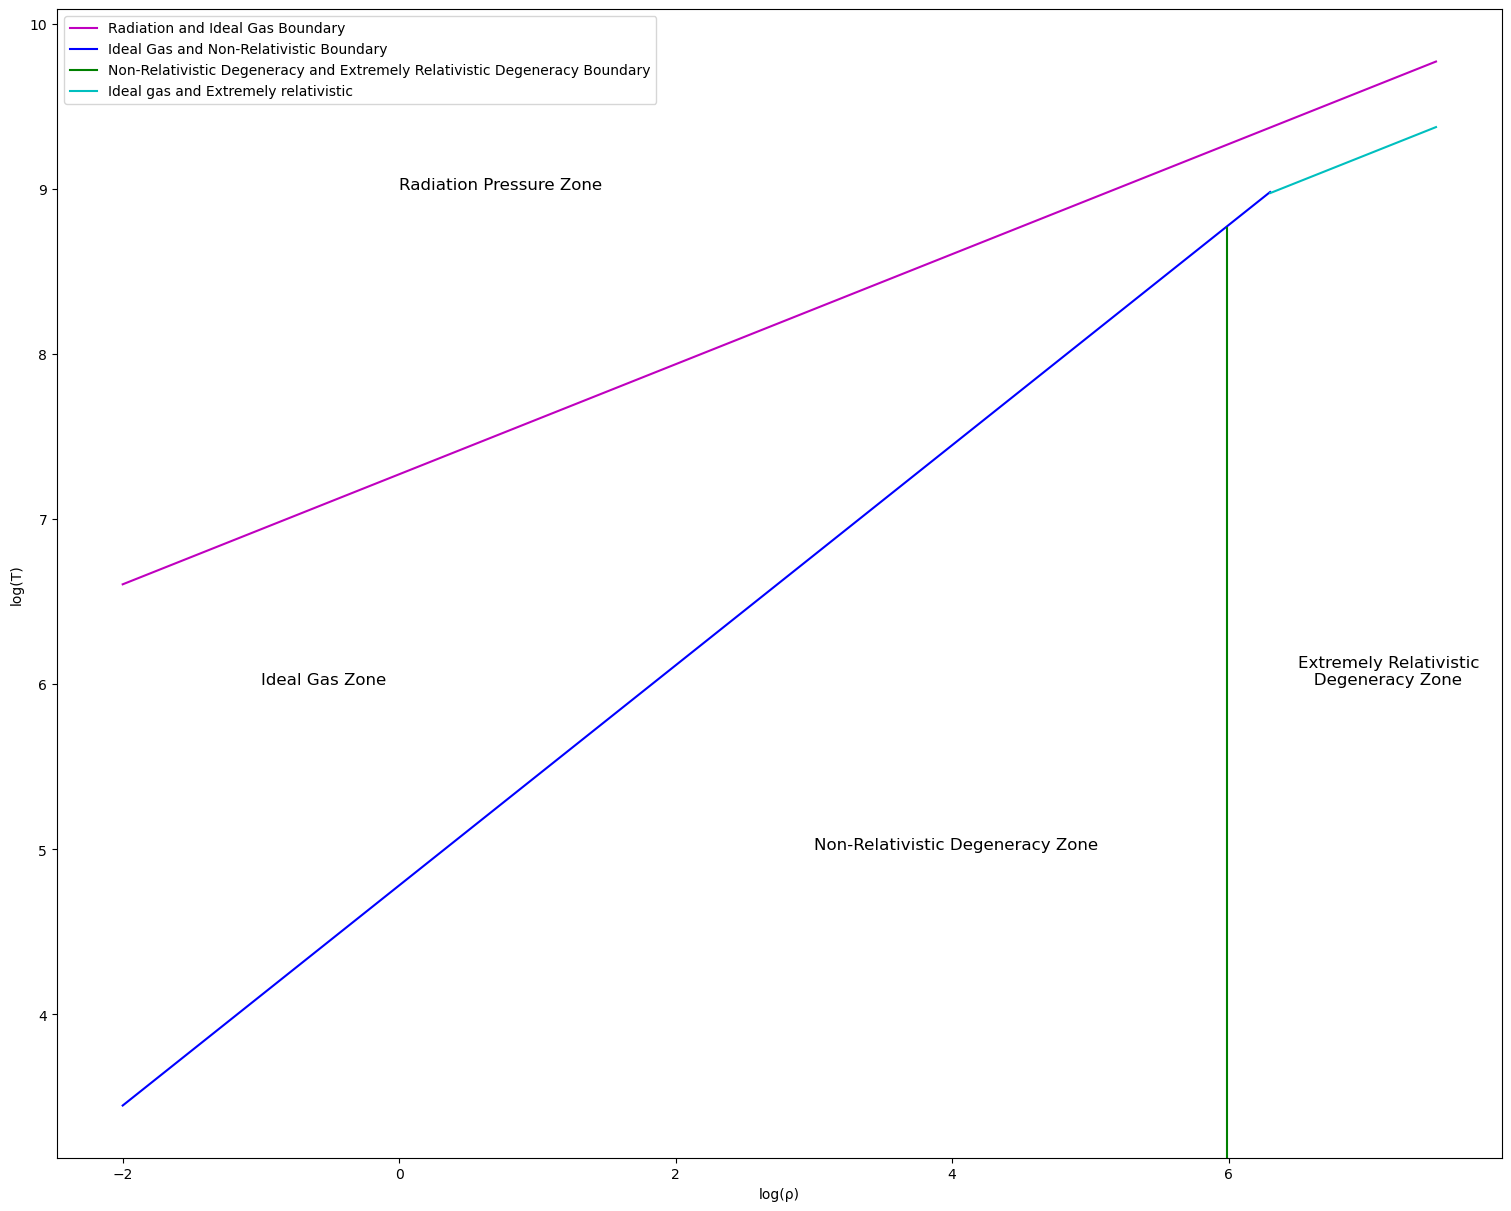

In [98]:
fig, ax = plt.subplots(
    figsize = (15,12),
    constrained_layout = True
)
ax.set_xlabel('log(ρ)')
ax.set_ylabel('log(T)')
ax.plot(rho, np.log10(radIdealBound), color = 'm', label = 'Radiation and Ideal Gas Boundary')
ax.plot(rhoIdealER, np.log10(idealNRBound), color = 'b', label = 'Ideal Gas and Non-Relativistic Boundary')
ax.axvline(x=np.log10(relativeNRBound), color = 'g', ymin = 0, ymax = 0.81, label = 'Non-Relativistic Degeneracy and Extremely Relativistic Degeneracy Boundary')
ax.plot(rhoNRER, np.log10(idealERBound), color = 'c', label = 'Ideal gas and Extremely relativistic')
ax.annotate('Radiation Pressure Zone',
            fontsize = 12,
            color = 'k',
           xy=(0,9))
ax.annotate('Ideal Gas Zone',
            fontsize = 12,
            color = 'k',
            xy=(-1,6))
ax.annotate('Non-Relativistic Degeneracy Zone',
            fontsize = 12,
            color = 'k',
            xy=(3,5))
ax.annotate(f'Extremely Relativistic\n   Degeneracy Zone',
            fontsize = 12,
            color = 'k',
            xy=(6.5,6))
ax.legend();

[0.9999833333333333, -3.333333333333334e-07]


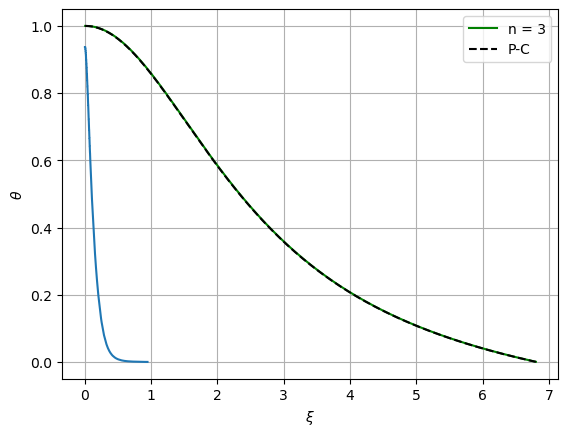

In [181]:
def solveLaneEmden(log_delta_xi=-2, n=3):
    delta_xi = 10**log_delta_xi
    
    # Inner boundary condition 
    y0 = 1 - delta_xi**2/6 
    z0 = -delta_xi**3/3 
    
    print([y0, z0])
    
    ys  = [y0]
    zs  = [z0]
    xis = [delta_xi]
    ycs = [y0]
    zcs = [z0]
    while True:
        y  =  ys[len(ys)  - 1]
        z  =  zs[len(zs)  - 1]
        xi = xis[len(xis) - 1]
        yc = ycs[len(ycs) - 1]
        zc = zcs[len(zcs) - 1]
        
        ## Primitive method 
        yi = y + delta_xi * z/xi**2
        zi = z + delta_xi * -xi**2*y**n
        
        ## Predictor-corrector technique 
        xii = xi + delta_xi
        yci = yc + 1/2 * delta_xi * (z/xi**2 + zi/xii**2)
        zci = zc + 1/2 * delta_xi * (-xi**2*y**n - xi**2*yi**n)
        
        # Outer boundary condition 
        if (yi < 1e-10 or yci < 1e-10): break
        
        xis += [xii]
        ys  += [yi]
        zs  += [zi]
        ycs += [yci]
        zcs += [zci]
    
    return (xis, ys, ycs)

def plotLaneEmden(log_delta_xi=-2, n=3):
    xis, ys, ycs = solveLaneEmden(log_delta_xi, n)
    
    #xi2 = np.arange(0, np.sqrt(6), 1e-3)
    #plt.plot(xi2, 1-xi2**2/6, label='n = 0')
    
    #xi2 = np.arange(0, np.pi, 1e-3)
    #plt.plot(xi2, np.sin(xi2)/xi2, label='n = 1')
    
    plt.plot(xis, ys,  'g',   label='n = '+str(n))
    plt.plot(xis, ycs, 'k--', label='P-C')
    
    plt.legend(loc='best')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\theta$')
    plt.grid()

plotLaneEmden()
plt.plot(bp2000['R/Rsun'], centralDensity);

In [158]:
bp2000 = pd.read_csv('./sunBP2000 - sunBP2000.csv')

In [129]:
bp2000

M/Msun   R/Rsun           T        Rho             P   L/Lsun       X,  \
0    0.000030  0.00650  15700000.0  152.00000  2.340000e+17  0.00027  0.33973   
1    0.000031  0.00661  15700000.0  152.00000  2.340000e+17  0.00028  0.33977   
2    0.000033  0.00671  15700000.0  152.00000  2.340000e+17  0.00029  0.33981   
3    0.000034  0.00681  15700000.0  152.00000  2.340000e+17  0.00031  0.33986   
4    0.000036  0.00692  15700000.0  152.00000  2.340000e+17  0.00032  0.33991   
..        ...      ...         ...        ...           ...      ...      ...   
871  0.999689  0.94773    287000.0    0.00854  3.270000e+11  1.00000  0.73925   
872  0.999695  0.94814    285000.0    0.00842  3.190000e+11  1.00000  0.73925   
873  0.999702  0.94855    282000.0    0.00830  3.120000e+11  1.00000  0.73925   
874  0.999708  0.94896    279000.0    0.00819  3.050000e+11  1.00000  0.73925   
875  0.999710  0.94904    279000.0    0.00817  3.040000e+11  1.00000  0.73925   

           Y       He3       C12       N14      O16  
0    0.64046  0.000007  0.000024  0.005450  0.00867  
1    0.64042  0.000007  0.000024  0.005450  0.00867  
2    0.64038  0.000007  0.000024  0.005450  0.00867  
3    0.64033  0.000007  0.000024  0.005450  0.00867  
4    0.64028  0.000007  0.000024  0.005450  0.00867  
..       ...       ...       ...       ...      ...  
871  0.24370  0.000100  0.002880  0.000854  0.00792  
872  0.24370  0.000100  0.002880  0.000854  0.00792  
873  0.24370  0.000100  0.002880  0.000854  0.00792  
874  0.24370  0.000100  0.002880  0.000854  0.00792  
875  0.24370  0.000100  0.002880  0.000854  0.00792  

[876 rows x 12 columns]

In [133]:
#Central Pressure is θ^(n+1)
centralPressure = (bp2000['P']* (u.dyn/u.cm**2))/(2.477e11 * ( u.g/(u.cm * u.s**2)))

In [174]:
#Central Density is θ^n
centralDensity = (bp2000['Rho']/(1.622e2))

In [175]:
radius = bp2000['R/Rsun'] * 6.957e8

[0.9999833333333333, -3.333333333333334e-07]
[0.9999833333333333, -3.333333333333334e-07]
[0.9999833333333333, -3.333333333333334e-07]


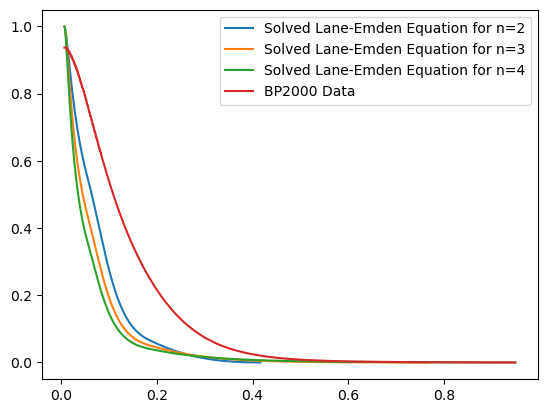

In [202]:
#plt.plot(radius, centralPressure)
xis2, ys2, ycs2 = solveLaneEmden(-2, 2)
xis3, ys3, ycs3 = solveLaneEmden(-2, 3)
xis4, ys4, ycs4 = solveLaneEmden(-2, 4)

cubeTheta3 = []
cubeTheta4 = []
cubeTheta2 = []
for i in ys3:
    cubeTheta3.append(i ** 3)
for i in ys2:
    cubeTheta2.append(i ** 2)
for i in ys4:
    cubeTheta4.append(i ** 4)
    
    
plt.plot(bp2000['R/Rsun'][:len(cubeTheta2)], cubeTheta2[:680], label = 'Solved Lane-Emden Equation for n=2')
plt.plot(bp2000['R/Rsun'][:len(cubeTheta3)], cubeTheta3[:680], label = 'Solved Lane-Emden Equation for n=3')
plt.plot(bp2000['R/Rsun'][:len(cubeTheta4)], cubeTheta4[:876], label = 'Solved Lane-Emden Equation for n=4')
plt.plot(bp2000['R/Rsun'], centralDensity, label = 'BP2000 Data')
plt.legend(loc = 'best');